In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.cleaning_text import Text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
#import pickle

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\37069\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('../data/totalwine_data.csv', index_col=0)

In [4]:
print(f'There are {df.duplicated().sum()} duplicated rows in this dataset.')

There are 0 duplicated rows in this dataset.


In [5]:
# Create new dataset with wished columns for the model

data = df[['score', 'description']].dropna().reset_index(drop=True)

In [6]:
data.head()

,score,description
0,92.0,"Wine Enthusiast -Ribera del Duero, Spain - ""Bl..."
1,91.0,"Wine Spectator-Sonoma Coast, Sonoma, CA- ""Exhi..."
2,90.0,"Wine Spectator-Columbia Valley, Washington - ""..."
3,94.0,"Jeb Dunnuck-Columbia Valley, Washington- ""Terr..."
4,100.0,"Wine Advocate-Napa, CA- ""Possesses an opaque b..."


In [7]:
def transform_points_simplified(points):
    if points < 92:
        return 1 # Poor
    elif points >= 92 and points < 94:
        return 2 # Satisfactory
    elif points >= 94 and points < 96:
        return 3 # Good
    elif points >= 96 and points < 98:
        return 4 # Very good
    else:
        return 5 # Excellent

In [8]:
# Add points simplified as a column

dataset = data.assign(points_simplified = data['score'].apply(transform_points_simplified))

In [9]:
dataset.head()

,score,description,points_simplified
0,92.0,"Wine Enthusiast -Ribera del Duero, Spain - ""Bl...",2
1,91.0,"Wine Spectator-Sonoma Coast, Sonoma, CA- ""Exhi...",1
2,90.0,"Wine Spectator-Columbia Valley, Washington - ""...",1
3,94.0,"Jeb Dunnuck-Columbia Valley, Washington- ""Terr...",3
4,100.0,"Wine Advocate-Napa, CA- ""Possesses an opaque b...",5


<AxesSubplot:title={'center':'Number of wines per points'}, xlabel='points_simplified', ylabel='Number of wines'>

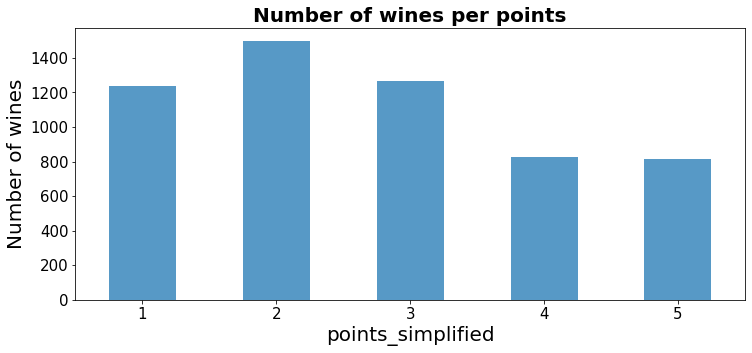

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.xticks(fontsize=15) # X Ticks
plt.yticks(fontsize=15) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=20) # Title
ax.set_ylabel('Number of wines', fontsize = 20) # Y label
ax.set_xlabel('Points', fontsize = 20) # X label
dataset.groupby(['points_simplified'])['description'].size().plot(ax=ax, kind='bar', alpha=0.75, rot=0)

In [11]:
list_of_descriptions = dataset['description'].to_list()

In [12]:
# Prepare description for vectorization

cleaned_descriptions = Text(list_of_descriptions).clean_text()

In [13]:
dataset['description'] = cleaned_descriptions

In [14]:
dataset.head()

,score,description,points_simplified
0,92.0,blackberry leather plum aromas inviting wine f...,2
1,91.0,exhibits rich dense core savory blackberry wil...,1
2,90.0,dense well structured brawny black cherry smok...,1
3,94.0,terrific red currants blackberries spice box c...,3
4,100.0,possesses opaque blue purple color well extrao...,5


In [15]:
X = dataset['description']
y = dataset['points_simplified']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
vectorizer = TfidfVectorizer()
classifier = RandomForestClassifier()

In [18]:
pipe = Pipeline(
    [
        ("Tfidf", vectorizer),
        ("Rcf", classifier)
        ]
    )
    
pipe.fit(X_train, y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('Rcf', RandomForestClassifier())])

In [19]:
# Testing the model
predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.50      0.54      0.52       112
           2       0.42      0.58      0.49       156
           3       0.51      0.46      0.49       130
           4       0.89      0.41      0.56        80
           5       0.81      0.70      0.75        87

    accuracy                           0.54       565
   macro avg       0.63      0.54      0.56       565
weighted avg       0.58      0.54      0.55       565



In [20]:
# with open("pipe.pkl", "wb") as picklefile:
#     pickle.dump(pipe, picklefile)